Melakukan analisis menggunakan metode statistik

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# import data
data = pd.read_csv(r"D:\Willy's Project\Project\Magang Diskominfo\data\result.csv")
# rubah nama labels menjadi sentiment
data.rename(columns={'labels': 'sentiment'}, inplace=True)

data

,title,stars,text,pelayanan,fasilitas,predicted_labels,sentiment
0,RS Brayat Minulya,5,telah dirawat di sini selama beberapa hari di ...,1,1,"['pelayanan', 'fasilitas']",positive
1,RS Brayat Minulya,5,bersih dan rapi petugas peeawatdokter ditanya ...,1,1,"['pelayanan', 'fasilitas']",positive
2,RS Brayat Minulya,5,terimakasih atas pelayanan dan perawatan ibu s...,1,0,['pelayanan'],positive
3,RS Brayat Minulya,5,pelayanan diruang yosef bagus perawat ramah ra...,1,0,['pelayanan'],positive
4,RS Brayat Minulya,5,tempatnya bagusrapi nyaman sekali ruangan nya ...,1,1,"['pelayanan', 'fasilitas']",positive
...,...,...,...,...,...,...,...
7634,Rumah Sakit Umum Pusat Surakarta,4,lama banget pelayanan untuk pasien baru ibu ny...,1,0,['pelayanan'],negative
7635,Rumah Sakit Umum Pusat Surakarta,4,hospital yg sangat rapi pelayanan bagus,1,1,"['pelayanan', 'fasilitas']",positive
7636,Rumah Sakit Umum Pusat Surakarta,4,khusus paru,0,0,[],positive
7637,Rumah Sakit Umum Pusat Surakarta,5,rs paru,0,0,[],neutral


In [6]:
# 1. Buat tabel kontingensi
contingency_table = pd.crosstab(data['stars'], data['sentiment'])
print("Tabel Kontingensi:")
print(contingency_table)

Tabel Kontingensi:
sentiment  negative  neutral  positive
stars                                 
1               690       73        36
2               143       20        15
3               111       43        68
4                89       69       410
5               102      282      5488


In [7]:
# 2. Uji Chi-Square
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("\nHasil Uji Chi-Square:")
print(f"Chi-Square Statistic: {chi2:.2f}")
print(f"P-value: {p:.4f}")
print(f"Degrees of Freedom: {dof}")


Hasil Uji Chi-Square:
Chi-Square Statistic: 5155.99
P-value: 0.0000
Degrees of Freedom: 8


In [8]:
# 3. Hitung Cramér’s V
n = contingency_table.sum().sum()  # Total observasi
phi2 = chi2 / n
r, k = contingency_table.shape
cramers_v = np.sqrt(phi2 / min(r-1, k-1))
print(f"Cramér’s V: {cramers_v:.4f}")

Cramér’s V: 0.5809


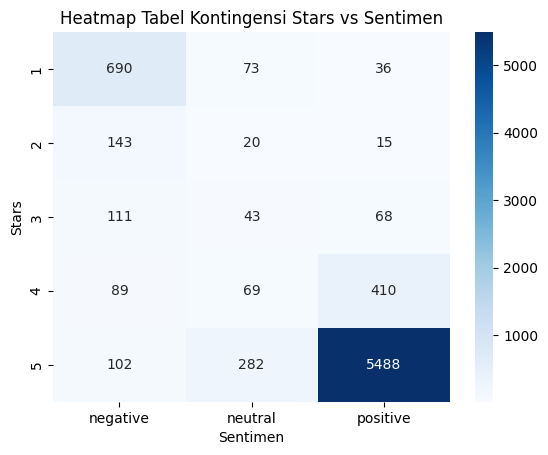

In [9]:
# 5. Visualisasi dengan Heatmap
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')
plt.title('Heatmap Tabel Kontingensi Stars vs Sentimen')
plt.xlabel('Sentimen')
plt.ylabel('Stars')
plt.show()